<a href="https://colab.research.google.com/github/arunaimlprojects/python-libraries/blob/main/data_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data load

In [8]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [9]:
#shape
#info datatype
#null values
#head
#duplicated
#coumns

EDA

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.shape

(891, 12)

आपने **Titanic-Dataset.csv** अपलोड किया है। अब हम इसे लोड करके डेटा की **cleaning और analysis** करेंगे।  

मैं पहले dataset को लोड करके इसकी जानकारी चेक करूँगा।

आपका **Titanic dataset** लोड हो गया है। इसमें निम्नलिखित महत्वपूर्ण कॉलम हैं:  
- **Survived** (1 = Survived, 0 = Not Survived)  
- **Pclass** (1st, 2nd, 3rd class)  
- **Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked**  

अब मैं **missing values**, **duplicates**, और **feature engineering** करके dataset को clean करूँगा।

✅ **Data Cleaning Complete!**  
- **Cabin** कॉलम ड्रॉप कर दिया गया (687 missing values)।  
- **Age** के missing values को **median से भर दिया गया** (पहले 177 missing थे, अब 0)।  
- **Embarked** के 2 missing values को mode से भर दिया गया।  
- **Fare** के missing values को भी median से भर दिया गया।  
- **Duplicates हटाए गए** (अगर कोई थे)।  

अब हम **Feature Engineering** करेंगे! 🚀

✅ **Feature Engineering Complete!**  
- **Family_Size** → कुल परिवार के सदस्यों की संख्या जोड़े गए।  
- **Alone** → अकेले यात्रा करने वाले यात्रियों को चिह्नित किया।  
- **Title** → नाम से "Mr, Mrs, Miss" जैसे टाइटल निकाले गए।  
- **Sex Encoding** → Male = 0, Female = 1 किया गया।  

अब हम **Data Analysis** करेंगे! 📊

📊 **Data Analysis Results:**  
1. **Survival Distribution** → अधिकांश यात्री नहीं बच सके।  
2. **Pclass vs Survival** → प्रथम श्रेणी (1st class) के यात्रियों के बचने की संभावना अधिक थी, जबकि तृतीय श्रेणी (3rd class) के यात्रियों की सबसे कम थी।  

अब आप और कौन सा विश्लेषण देखना चाहते हैं? 🚀

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived'>

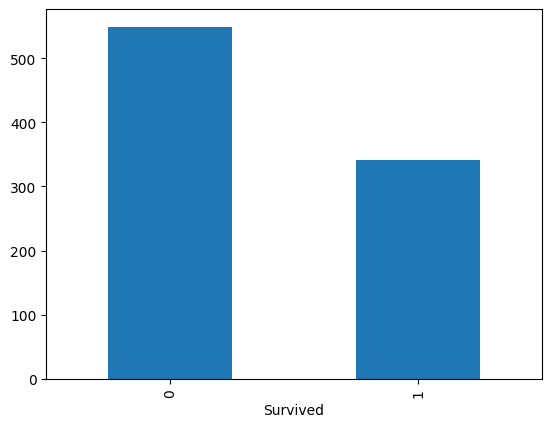

In [19]:
df['Survived'].value_counts().plot(kind='bar')

In [20]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: ylabel='count'>

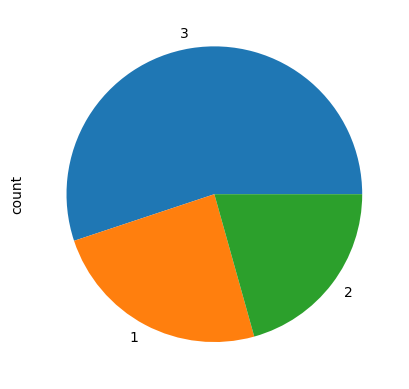

In [22]:
df['Pclass'].value_counts().plot(kind='pie')

In [ ]:
#survived
#pclass

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [25]:
#survived-dead-542,ache-340
#pclass-ist,2nd,3rd
#sex-male-577,female-314

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
30.00,25
19.00,25
...,...
66.00,1
0.92,1
23.50,1


In [28]:
df['Age'].max()

80.0

In [29]:
df['Age'].min()#

0.42

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
fare = df['Fare'].value_counts(ascending=True)

In [38]:
fare[0]

15

In [39]:
df['Fare'].min()

0.0

In [40]:
df['Fare'].max()

512.3292

In [41]:
df['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
F2,3
C22 C26,3
...,...
C106,1
A19,1
D7,1


In [42]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.groupby(['Survived','Sex'])['Age'].count()

Survived  Sex   
0         female     64
          male      360
1         female    197
          male       93
Name: Age, dtype: int64

In [46]:
df.groupby(['Survived','Pclass'])['Age'].count()

Survived  Pclass
0         1          64
          2          90
          3         270
1         1         122
          2          83
          3          85
Name: Age, dtype: int64

In [47]:
df.groupby(['Survived','SibSp'])['Age'].count()

Survived  SibSp
0         0        296
          1         86
          2         14
          3          8
          4         15
          5          5
          8          0
1         0        175
          1         97
          2         11
          3          4
          4          3
Name: Age, dtype: int64

<Axes: xlabel='Survived,Embarked'>

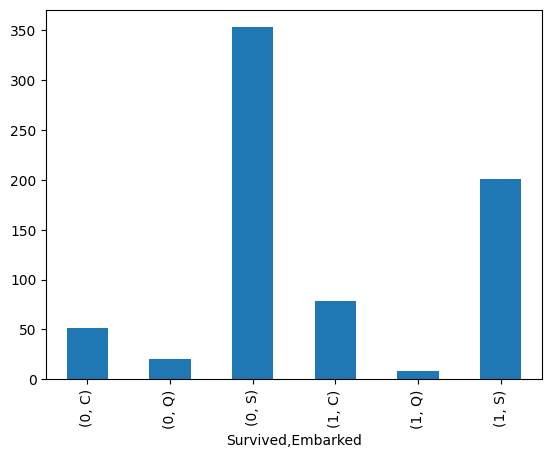

In [49]:
df.groupby(['Survived','Embarked'])['Age'].count().plot(kind='bar')

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.groupby(['Sex'])['Survived'].count()

,Survived
Sex,
female,314
male,577


In [55]:
df.pivot_table(index='Survived',columns='Sex',values='Age',aggfunc='count')

Sex,female,male
Survived,,
0,64,360
1,197,93


In [56]:
df.pivot_table(index='Survived',columns='Pclass',values='Age',aggfunc='count')

Pclass,1,2,3
Survived,,,
0,64,90,270
1,122,83,85


data cleaning

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [61]:
#age-177
#cain-687
#emarked-2

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.drop(['Cabin'],axis=1,inplace=True)

In [65]:
df.shape

(891, 11)

In [66]:
#age
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [70]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [71]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [72]:
#duplicated
df.duplicated().sum()

0

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
df['name2'] = df['Name'].str.split(',',expand=True)[0]

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen


In [88]:
df.drop(['Name'],axis=1,inplace=True)

In [89]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name2
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Futrelle
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Allen


In [90]:
df['Survived'].replace({1:'live',0:'Dead'},inplace=True)

In [91]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name2
0,1,Dead,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund
1,2,live,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings
2,3,live,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen
3,4,live,1,female,35.0,1,0,113803,53.1000,S,Futrelle
4,5,Dead,3,male,35.0,0,0,373450,8.0500,S,Allen


In [96]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [97]:
df['family'] = df['SibSp'] + df['Parch']

In [98]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name2,family
0,1,Dead,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund,1
1,2,live,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings,1
2,3,live,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,0
3,4,live,1,female,35.0,1,0,113803,53.1000,S,Futrelle,1
4,5,Dead,3,male,35.0,0,0,373450,8.0500,S,Allen,0


In [99]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [100]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,name2,family
0,1,Dead,3,male,22.0,A/5 21171,7.2500,S,Braund,1
1,2,live,1,female,38.0,PC 17599,71.2833,C,Cumings,1
2,3,live,3,female,26.0,STON/O2. 3101282,7.9250,S,Heikkinen,0
3,4,live,1,female,35.0,113803,53.1000,S,Futrelle,1
4,5,Dead,3,male,35.0,373450,8.0500,S,Allen,0


In [103]:
df['Ticket'].value_counts()

,count
Ticket,
1601,7
CA. 2343,7
347082,7
3101295,6
CA 2144,6
...,...
A/5 21172,1
349219,1
234818,1


In [105]:
df['Ticket'].str.isalnum()

,Ticket
0,False
1,False
2,False
3,True
4,True
...,...
886,True
887,True
888,False
889,True


In [106]:
df['Ticket'].str.isdigit()

,Ticket
0,False
1,False
2,False
3,True
4,True
...,...
886,True
887,True
888,False
889,True


In [107]:
df['Ticket'].str.isalpha()

,Ticket
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [108]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,name2,family
0,1,Dead,3,male,22.0,A/5 21171,7.2500,S,Braund,1
1,2,live,1,female,38.0,PC 17599,71.2833,C,Cumings,1
2,3,live,3,female,26.0,STON/O2. 3101282,7.9250,S,Heikkinen,0
3,4,live,1,female,35.0,113803,53.1000,S,Futrelle,1
4,5,Dead,3,male,35.0,373450,8.0500,S,Allen,0


In [109]:
df['Ticket'].str.split(' ',expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [110]:
df['tic'] = df['Ticket'].str.split(',',expand=True)[0]

,0
0,A/5 21171


In [114]:
df[['letters', 'numbers']] = df['Ticket'].str.extract(r'([a-zA-Z]+)(\d+)')


In [115]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,name2,family,tic,letters,numbers
0,1,Dead,3,male,22.0,A/5 21171,7.2500,S,Braund,1,A/5 21171,NaN,NaN
1,2,live,1,female,38.0,PC 17599,71.2833,C,Cumings,1,PC 17599,NaN,NaN
2,3,live,3,female,26.0,STON/O2. 3101282,7.9250,S,Heikkinen,0,STON/O2. 3101282,O,2
3,4,live,1,female,35.0,113803,53.1000,S,Futrelle,1,113803,NaN,NaN
4,5,Dead,3,male,35.0,373450,8.0500,S,Allen,0,373450,NaN,NaN


In [116]:
df.drop(['Ticket','tic'],axis=1,inplace=True)

In [117]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,name2,family,letters,numbers
0,1,Dead,3,male,22.0,7.2500,S,Braund,1,NaN,NaN
1,2,live,1,female,38.0,71.2833,C,Cumings,1,NaN,NaN
2,3,live,3,female,26.0,7.9250,S,Heikkinen,0,O,2
3,4,live,1,female,35.0,53.1000,S,Futrelle,1,NaN,NaN
4,5,Dead,3,male,35.0,8.0500,S,Allen,0,NaN,NaN


In [119]:
df['letters'].value_counts()

,count
letters,
O,8
A,1


In [120]:
df['numbers'].value_counts()

,count
numbers,
2,8
4,1


In [123]:
df['name2']

,name2
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
...,...
886,Montvila
887,Graham
888,Johnston
889,Behr


In [124]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,name2,family,letters,numbers
0,1,Dead,3,male,22.0,7.2500,S,Braund,1,NaN,NaN
1,2,live,1,female,38.0,71.2833,C,Cumings,1,NaN,NaN
2,3,live,3,female,26.0,7.9250,S,Heikkinen,0,O,2
3,4,live,1,female,35.0,53.1000,S,Futrelle,1,NaN,NaN
4,5,Dead,3,male,35.0,8.0500,S,Allen,0,NaN,NaN


In [125]:
df.iloc[0:11]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,name2,family,letters,numbers
0,1,Dead,3,male,22.000000,7.2500,S,Braund,1,NaN,NaN
1,2,live,1,female,38.000000,71.2833,C,Cumings,1,NaN,NaN
2,3,live,3,female,26.000000,7.9250,S,Heikkinen,0,O,2
3,4,live,1,female,35.000000,53.1000,S,Futrelle,1,NaN,NaN
4,5,Dead,3,male,35.000000,8.0500,S,Allen,0,NaN,NaN
5,6,Dead,3,male,29.699118,8.4583,Q,Moran,0,NaN,NaN
6,7,Dead,1,male,54.000000,51.8625,S,McCarthy,0,NaN,NaN
7,8,Dead,3,male,2.000000,21.0750,S,Palsson,4,NaN,NaN
8,9,live,3,female,27.000000,11.1333,S,Johnson,2,NaN,NaN
9,10,live,2,female,14.000000,30.0708,C,Nasser,1,NaN,NaN


In [126]:
df.reset_index(drop=True,inplace=True)

In [127]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,name2,family,letters,numbers
0,1,Dead,3,male,22.000000,7.2500,S,Braund,1,NaN,NaN
1,2,live,1,female,38.000000,71.2833,C,Cumings,1,NaN,NaN
2,3,live,3,female,26.000000,7.9250,S,Heikkinen,0,O,2
3,4,live,1,female,35.000000,53.1000,S,Futrelle,1,NaN,NaN
4,5,Dead,3,male,35.000000,8.0500,S,Allen,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,Dead,2,male,27.000000,13.0000,S,Montvila,0,NaN,NaN
887,888,live,1,female,19.000000,30.0000,S,Graham,0,NaN,NaN
888,889,Dead,3,female,29.699118,23.4500,S,Johnston,3,NaN,NaN
889,890,live,1,male,26.000000,30.0000,C,Behr,0,NaN,NaN


In [128]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'name2', 'family', 'letters', 'numbers'],
      dtype='object')

In [129]:
data = df[['name2','PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked','family', 'letters', 'numbers']]

In [130]:
data.head()

,name2,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family,letters,numbers
0,Braund,1,Dead,3,male,22.0,7.2500,S,1,NaN,NaN
1,Cumings,2,live,1,female,38.0,71.2833,C,1,NaN,NaN
2,Heikkinen,3,live,3,female,26.0,7.9250,S,0,O,2
3,Futrelle,4,live,1,female,35.0,53.1000,S,1,NaN,NaN
4,Allen,5,Dead,3,male,35.0,8.0500,S,0,NaN,NaN


In [132]:
data.drop(['PassengerId'],axis=1,inplace=True)

In [133]:
data.head()

,name2,Survived,Pclass,Sex,Age,Fare,Embarked,family,letters,numbers
0,Braund,Dead,3,male,22.0,7.2500,S,1,NaN,NaN
1,Cumings,live,1,female,38.0,71.2833,C,1,NaN,NaN
2,Heikkinen,live,3,female,26.0,7.9250,S,0,O,2
3,Futrelle,live,1,female,35.0,53.1000,S,1,NaN,NaN
4,Allen,Dead,3,male,35.0,8.0500,S,0,NaN,NaN


In [136]:
data['letters'] = data['letters'].fillna(df['letters']).mode()[0]

In [138]:
data.head()

,name2,Survived,Pclass,Sex,Age,Fare,Embarked,family,letters,numbers
0,Braund,Dead,3,male,22.0,7.2500,S,1,O,NaN
1,Cumings,live,1,female,38.0,71.2833,C,1,O,NaN
2,Heikkinen,live,3,female,26.0,7.9250,S,0,O,2
3,Futrelle,live,1,female,35.0,53.1000,S,1,O,NaN
4,Allen,Dead,3,male,35.0,8.0500,S,0,O,NaN


In [139]:
data['numbers'] = data['numbers'].fillna(df['numbers']).mode()[0]

In [140]:
data.head()

,name2,Survived,Pclass,Sex,Age,Fare,Embarked,family,letters,numbers
0,Braund,Dead,3,male,22.0,7.2500,S,1,O,2
1,Cumings,live,1,female,38.0,71.2833,C,1,O,2
2,Heikkinen,live,3,female,26.0,7.9250,S,0,O,2
3,Futrelle,live,1,female,35.0,53.1000,S,1,O,2
4,Allen,Dead,3,male,35.0,8.0500,S,0,O,2


In [142]:
data['Pclass'].replace({1:'first',2:'second',3:'third'},inplace=True)

In [143]:
data.head()

,name2,Survived,Pclass,Sex,Age,Fare,Embarked,family,letters,numbers
0,Braund,Dead,third,male,22.0,7.2500,S,1,O,2
1,Cumings,live,first,female,38.0,71.2833,C,1,O,2
2,Heikkinen,live,third,female,26.0,7.9250,S,0,O,2
3,Futrelle,live,first,female,35.0,53.1000,S,1,O,2
4,Allen,Dead,third,male,35.0,8.0500,S,0,O,2


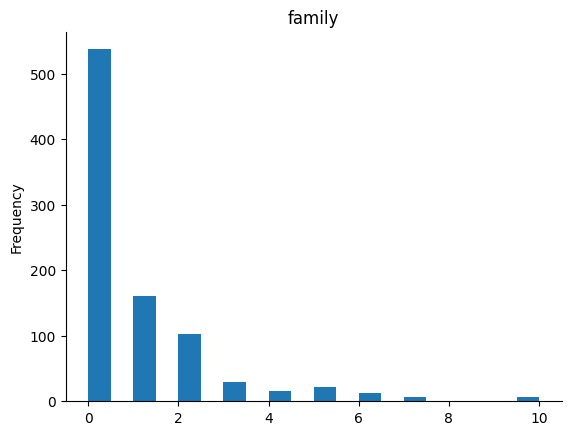

In [146]:
# @title family

from matplotlib import pyplot as plt
data['family'].plot(kind='hist', bins=20, title='family')
plt.gca().spines[['top', 'right',]].set_visible(False)